In [1]:
import numpy as np
from matplotlib import pyplot as plt



In [2]:

#print(colormaps)
plt.figure(figsize=(3, 3))
drift = 0.001
xmin, xmax = -1.00001, 1.00001
ymin, ymax = -1.00001, 1.00001
xsamples = 2 ** 10
ysamples = 2 ** 10
xrange = np.linspace(xmin, xmax, num=xsamples)
yrange = np.linspace(ymin, ymax, num=ysamples)

x, y = np.meshgrid(xrange, yrange)

<Figure size 300x300 with 0 Axes>

In [3]:
options = {
    "extent": (xmin, xmax, ymin, ymax),
    "origin": "lower",
    "aspect": "equal",
}


def imshow(data, **kwargs):
    plt.figure(figsize=(3, 3))
    plt.imshow(data, **options, **kwargs)
    plt.colorbar()
    plt.show()

In [4]:
def quiver(data,stride=3,**kwargs):
    xstride = len(x) // 2**stride
    ystride = len(y) // 2**stride
    xi = x[::ystride, ::xstride]
    yi = y[::ystride,::xstride]
    datai = data[:,::ystride, ::xstride]
    plt.quiver(xi,yi,datai[0],datai[1],**kwargs)


In [5]:
def plot_3d(data):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(x,y,data,cmap='viridis')

In [6]:
def divergence(data):
    div = np.gradient(data[0],axis=0) + np.gradient(data[1],axis=1)
    return div


In [7]:
vec_r = np.array([x, y])
r = np.linalg.norm(vec_r,axis=0)
r.shape

(1024, 1024)

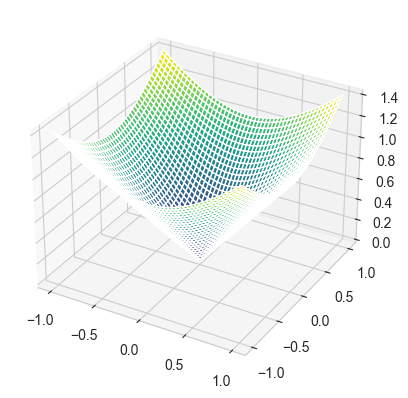

In [8]:
#imshow(r)
plot_3d(r)

In [9]:
columb = -vec_r/(np.pow(r,3)+0.001)
columb.shape


(2, 1024, 1024)

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-1.00001   , -1.00001   , -1.00001   , ..., -1.00001   ,
         -1.00001   , -1.00001   ],
        [-0.99805495, -0.99805495, -0.99805495, ..., -0.99805495,
         -0.99805495, -0.99805495],
        [-0.99609989, -0.99609989, -0.99609989, ..., -0.99609989,
         -0.99609989, -0.99609989],
        ...,
        [ 0.99609989,  0.99609989,  0.99609989, ...,  

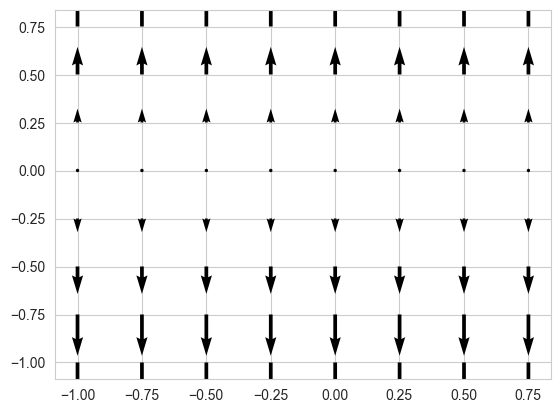

In [10]:
y_vec = np.array([np.zeros_like(x),y])
quiver(y_vec)
divergence(y_vec)
y_vec.shape
y_vec

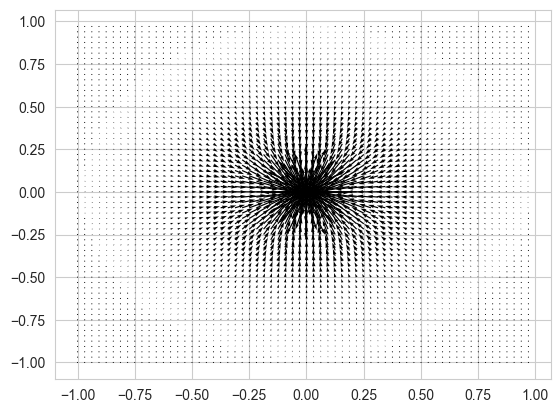

In [11]:

quiver(columb,6)

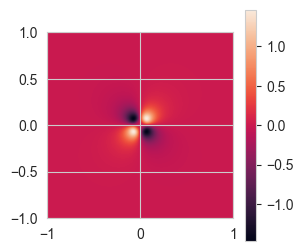

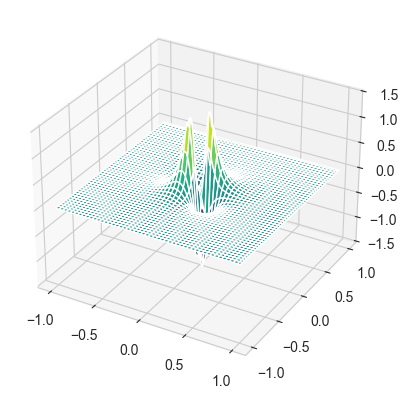

In [12]:
div = divergence(columb)
imshow(div)
plot_3d(div)